# 일원분산(Anova)분석

* 셋 이상의 그룹 간 차이를 확인하기 위한 가설 검정 방법 
* ANOVA : ANalysis Of Variance : 분산분석
* 일원분산분석 : One-way Anova : 분산에 사용된 요인이 한개 one factor

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("datas2/지점별_일별판매량.csv", encoding = 'euc-kr')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [4]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

# code 분석
# df['    '] : DataFrame인 'df'에서 기입한 이름의 column을 선택
# .dropna() : 결측값(NaN, None 등)을 제거. 즉 해당 열에서 비어있는 값을 모두 삭제
# values : 값을 numpy배열(array)로 변환

In [8]:
print(A)

[124 147 129 123 147 149 140 142 124 166 127 130 139 121 149 155 140 150
 137 144 136 126 150 142 149 127 140 138 128 117]


> 결과 : 지점A의 모든 value를 가져온 상태, 그것을 'A'라는 array에 입힘.

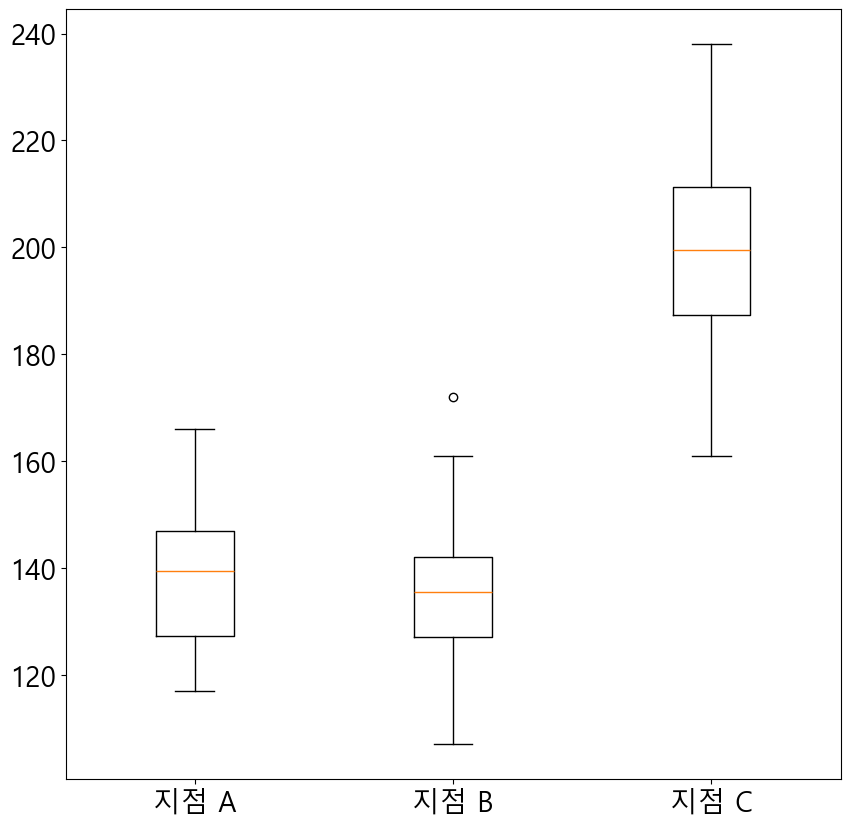

In [9]:
# 박스플롯으로 시각화
from matplotlib import pyplot as plt

# 스탭1) 폰트 및 그래프 설정
plt.rcParams["font.family"] = 'Malgun Gothic'  # 한글 폰트 설정 (맑은 고딕)
plt.rcParams["font.size"] = 20                 # 폰트 크기 20으로 설정
plt.rcParams["figure.figsize"] = (10, 10)      # 그래프 크기 10x10 인치

# 스탭2) 박스 플롯 생성
plt.boxplot([A, B, C])

# 스탭3) X축 라벨 설정
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])

# 그래프 출력
plt.show()

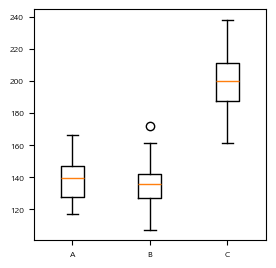

In [12]:
# 박스플롯으로 시각화
from matplotlib import pyplot as plt

# 스탭1) 폰트 및 그래프 설정 /// 좀 작게 시도하면?
plt.rcParams["font.family"] = 'Malgun Gothic'  # 한글 폰트 설정 (맑은 고딕)
plt.rcParams["font.size"] = 6                 # 폰트 크기 20으로 설정
plt.rcParams["figure.figsize"] = (3, 3)      # 그래프 크기 10x10 인치

# 스탭2) 박스 플롯 생성
plt.boxplot([A, B, C])

# 스탭3) X축 라벨 설정  /// 이름 변경 가능
plt.xticks([1, 2, 3], ['A', 'B', 'C'])

# 그래프 출력
plt.show()

### 정규성 검정
* Shapiro-Wilk 검정

In [13]:
from scipy import stats
print(stats.shapiro(A-B,))
print(stats.shapiro(A-C))
print(stats.shapiro(B-C))

ShapiroResult(statistic=np.float64(0.9806113784179772), pvalue=np.float64(0.8415709891789398))
ShapiroResult(statistic=np.float64(0.9756594683381399), pvalue=np.float64(0.7021590584338278))
ShapiroResult(statistic=np.float64(0.9766118849758917), pvalue=np.float64(0.7301124246612438))


[해석] 모두 p-value > 0.05 : 각 변수간의 차이가, 모두 정규 분포를 뛴다는 것을 알 수 있음.

> A-B 차이의 정규성 검정<br>
> ShapiroResult(statistic=np.float64(0.9806113784179772), pvalue=np.float64(0.8415709891789398))<br>

> A-C 차이의 정규성 검정<br>
> ShapiroResult(statistic=np.float64(0.9756594683381399), pvalue=np.float64(0.7021590584338278))

> B-C 차이의 정규성 검정<br>
> ShapiroResult(statistic=np.float64(0.9766118849758917), pvalue=np.float64(0.7301124246612438))

세 파트 모두 pvlue=np.float64 부분의 수치가 0.5보다 크므로 = p-value >0.5 : 정규분포를 따른다 = 정규성이 확인되었다 = 각 지점 간 평균 차이가 통계적으로 유의하게 있다.

##파이썬을 이용한 일원분산분석

### 등분산성 검정

* 레빈 검정 (Levene's Test) - 권장
* center='median'이 기본값이며, 평균(mean)보다 이상치에 덜 민감하여 더 안정적임

In [14]:
levene_stat, levene_p_value = stats.levene(A, B, C, center='median')
print(f"levene_stat: {levene_stat}, levene_p_value: {levene_p_value}")

levene_stat: 1.244640322359082, levene_p_value: 0.29312188689352464


### 일원분산 분석 수행

In [16]:
# # Tukey HSD 사후분석
print(stats.f_oneway(A, B, C)) 

F_onewayResult(statistic=np.float64(178.43825416847133), pvalue=np.float64(1.6337420285664832e-31))


### 사후분석

In [19]:
from statsmodels.stats import multicomp 
# 분석 대상 데이터
Data = A.tolist() + B.tolist() + C.tolist()
# 각 값이 속한 그룹 이름
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)

print(Data)
print(Group)

[124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139, 121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127, 140, 138, 128, 117, 118, 141, 130, 127, 107, 140, 146, 122, 160, 157, 141, 142, 150, 136, 157, 107, 172, 126, 135, 115, 133, 132, 127, 128, 142, 161, 140, 125, 142, 135, 216, 214, 212, 179, 222, 238, 218, 200, 186, 188, 216, 183, 198, 199, 187, 183, 190, 161, 203, 192, 235, 208, 187, 201, 196, 202, 209, 179, 197, 204]
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


In [20]:
# 사후 분석
print(multicomp.pairwise_tukeyhsd(Data, Group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -1.4 0.9297 -10.5741  7.7741  False
     A      C  62.2333    0.0  53.0592 71.4075   True
     B      C  63.6333    0.0  54.4592 72.8075   True
-----------------------------------------------------


[해석]

* 결론: [A, B] / [C]로 데이터가 구분됨
* reject False, p-adj > 0.05
    * A - B는 유의한 차이가 존재하지 않음
* reject True, p-adj <= 0.05
    * A - C는 유의한 차이 존재
* reject True, p-adj <= 0.05
    * B - C는 유의한 차이 존재
    * 
[tip] reject의 의미
* False : 귀무가설 기각하지 않음.
* T*rue : 귀무가설을 기각함.
* 
[tip] statsmodels 라이브러리
*  !pip install statsmodels
*  회귀 분석, 시계열 분석, 분산 분석(ANOVA), 가설 검정 등 다양한 통계 기법을 포함하고 있어, 데이터 분석 및 경제학, 사회과학 연구 등에서 널리 사용